In [7]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [8]:
# Load settings from config.yaml
with open("config.yaml", 'r') as file:
    config = yaml.safe_load(file)

In [9]:
# Load the ideal weights data
ideal_weights_data_path = config['ideal_weights']['data']['ideal_weights_data_path']
weights_data = pd.read_csv(ideal_weights_data_path)

# Load the indexes data
all_parameters_data_path = config['merge_and_scale_data']['data']['all_parameters_merged_data_path']
data = pd.read_csv(all_parameters_data_path, parse_dates=['Date'])

# Extract the weights with the highest total score
best_weights_row = weights_data.loc[weights_data['Total Score'].idxmax()]
weights_str = best_weights_row['Weights']

# Extract individual weights from the weights string (assuming 'w1', 'w2', 'w3', 'w4' format)
weights = {f"w{i+1}": float(val.split('=')[1]) for i, val in enumerate(weights_str.split(','))}

# Calculate the 'F' column using the extracted weights
data['F'] = round(
        (1 / (1 + (weights['w1'] * data['PR_Scaled']))) *
        (1 + (weights['w2'] * data['LAR_Scaled'])) * 
        (1 / (1 + (weights['w3'] * data['OP_Price_Scaled']))) *
        (1 + (weights['w4'] * data['AVPI_Scaled'])), 6)

# Calculate the 'Videal' column
f_max = data['F'].max() 
 
beta = config['calculate_IVS']['parametres']['beta']
alpha = config['calculate_IVS']['parametres']['alpha']

F_min = data['F'].min()
F_max = data['F'].max()

data['IVS'] = round(data['Votable Supply'] * (beta + (np.exp(alpha * ((data['F'] - F_min) / (F_max - F_min))) - 1)), 2)

data['IVS/VS'] = round(data['IVS'] / data['Votable Supply'], 2)

print('w1 -', weights['w1'])
print('w2 -', weights['w2'])
print('w3 -', weights['w3'])
print('w4 -', weights['w4'])

IVS_data_path = config['calculate_final_IVS']['data']['calculated_daily_IVS_data_path']
data.to_csv(IVS_data_path, index=False)


w1 - 0.29
w2 - 0.28
w3 - 0.27
w4 - 0.15


In [10]:
print(data['IVS/VS'].min())
print(data['IVS/VS'].max())

1.35
2.36


In [11]:
data = pd.read_csv(IVS_data_path)

In [12]:
data['Date'] = pd.to_datetime(data['Date'])

In [13]:
f_min = data['F'].min()
f_min

np.float64(0.705101)

In [14]:
f_max = data['F'].max()
f_max

np.float64(1.100402)

In [15]:
# Resample by month and take the mean
monthly_data = data.resample('M', on='Date')[['Votable Supply', 'F', 'IVS']].mean()

monthly_data['IVS/VS'] = round(monthly_data['IVS'] / monthly_data['Votable Supply'], 2)

# Save to CSV
calculated_monthly_IVS_data_path = config['calculate_final_IVS']['data']['calculated_monthly_IVS_data_path']
monthly_data.to_csv(calculated_monthly_IVS_data_path, index=True)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12172\556387691.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M', on='Date')[['Votable Supply', 'F', 'IVS']].mean()


In [16]:
print(monthly_data['IVS/VS'].min())
print(monthly_data['IVS/VS'].max())

1.44
2.18


In [17]:
monthly_data

,Votable Supply,F,IVS,IVS/VS
Date,,,,
2023-12-31,7.959359e+07,0.826638,1.267914e+08,1.59
2024-01-31,8.048624e+07,0.774717,1.189495e+08,1.48
2024-02-29,8.921727e+07,0.767971,1.309744e+08,1.47
2024-03-31,8.840651e+07,0.753901,1.274676e+08,1.44
2024-04-30,8.784757e+07,0.816938,1.381793e+08,1.57
2024-05-31,9.055358e+07,0.826831,1.441524e+08,1.59
2024-06-30,9.128598e+07,0.871663,1.546343e+08,1.69
2024-07-31,9.168993e+07,0.887609,1.588975e+08,1.73
2024-08-31,9.354338e+07,0.904487,1.661095e+08,1.78


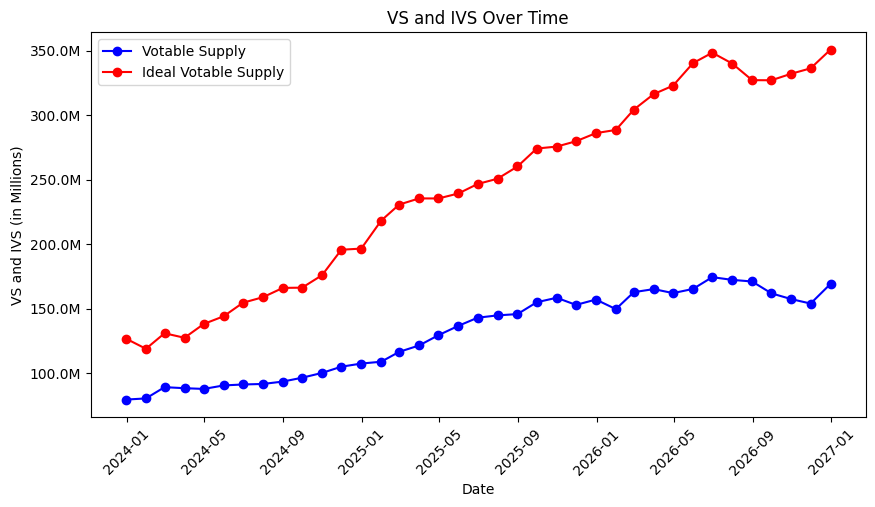

In [18]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
ax.plot(monthly_data.index, monthly_data["Votable Supply"], marker='o', color='blue', label="Votable Supply")
ax.plot(monthly_data.index, monthly_data["IVS"], marker='o', color='red', label="Ideal Votable Supply")

# Format y-axis in Millions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M'))

# Labels and title
ax.set_xlabel("Date")
ax.set_ylabel("VS and IVS (in Millions)")
ax.set_title("VS and IVS Over Time")
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


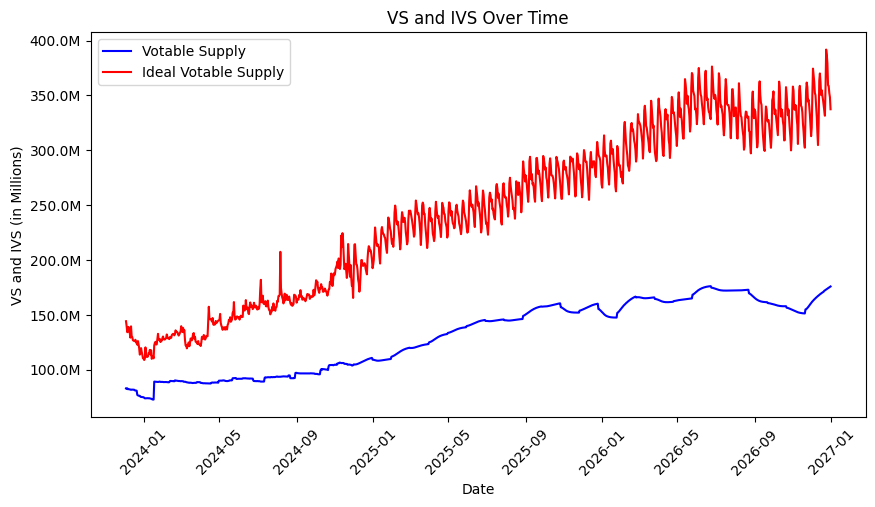

In [19]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
ax.plot(data['Date'], data["Votable Supply"], color='blue', label="Votable Supply")
ax.plot(data['Date'], data["IVS"], color='red', label="Ideal Votable Supply")

# Format y-axis in Millions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M'))

# Labels and title
ax.set_xlabel("Date")
ax.set_ylabel("VS and IVS (in Millions)")
ax.set_title("VS and IVS Over Time")
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()
